# **Import Necessary Libraries**

In [ ]:
import os
import cv2
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# **Mount Google Drive to access Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Main Path Configuration**

In [ ]:
main_path ='/content/drive/MyDrive/Colab Notebooks/CVPR/Animals'
foldernames = os.listdir(main_path)

# **Navigating through each folder**

In [ ]:
foldernames = os.listdir(main_path)

**Checked the Animal folder and found five subfolders, each representing a unique category**

In [ ]:
print(foldernames)

['Leopard', 'Lion', 'Cheetah', 'Tiger', 'Jaguar']


**Accessed each folder by joining the Animal folder path with each folder name. foldernames[0] represents the ‘Leopard’ folder**

In [ ]:
individualpath_for_Leopard=os.path.join(main_path,foldernames[0])
print(individualpath_for_Leopard)

/content/drive/MyDrive/Colab Notebooks/CVPR/Animals/Leopard


**To access each image in the Leopard folder, Iterate through the directory to retrieve each image name**

In [ ]:
for img_name in os.listdir(individualpath_for_Leopard):
  print(img_name)

**After retrieving each image name, Connected it with the folder path to get the full image path. Since working with the Leopard folder, stored all image names in imgname_Leopard**

In [ ]:
imgname_Leopard=os.listdir(individualpath_for_Leopard)

In [ ]:
each_img_path_Leopard=os.path.join(individualpath_for_Leopard,imgname_Leopard[0])
print(each_img_path_Leopard)

/content/drive/MyDrive/Colab Notebooks/CVPR/Animals/Leopard/pexels-photo-730487.jpeg


**After finding the image path in the Leopard directory, will display the image as a NumPy array, then view it in its actual format.**

In [ ]:
read_img=cv2.imread(each_img_path_Leopard)
print(read_img)

[[[230 228 228]
  [230 228 228]
  [230 228 228]
  ...
  [236 234 234]
  [236 234 234]
  [236 234 234]]

 [[230 228 228]
  [230 228 228]
  [230 228 228]
  ...
  [236 234 234]
  [236 234 234]
  [236 234 234]]

 [[230 228 228]
  [230 228 228]
  [230 228 228]
  ...
  [236 234 234]
  [236 234 234]
  [236 234 234]]

 ...

 [[229 229 229]
  [229 229 229]
  [229 229 229]
  ...
  [233 233 233]
  [233 233 233]
  [233 233 233]]

 [[229 229 229]
  [229 229 229]
  [229 229 229]
  ...
  [233 233 233]
  [233 233 233]
  [233 233 233]]

 [[229 229 229]
  [229 229 229]
  [229 229 229]
  ...
  [233 233 233]
  [233 233 233]
  [233 233 233]]]


**Check the shape of the image.**

In [ ]:
print(read_img.shape)

(333, 500, 3)


**Fetched a single RGB image from the Leopard directory.**

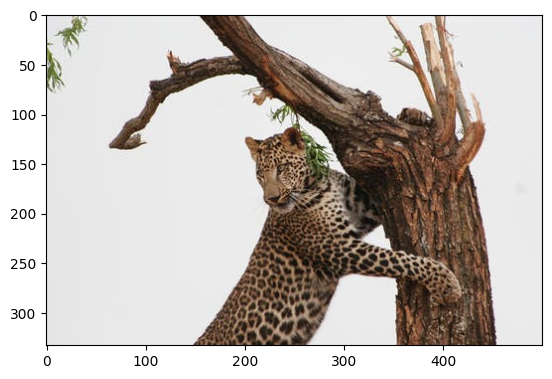

In [ ]:
rgb_img=cv2.cvtColor(read_img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgb_img)
plt.show()

**Repeat the process for all the images in the Leopard directory.**

In [ ]:
for img in os.listdir(individualpath_for_Leopard):
  each_img_path_for_Leopard=os.path.join(individualpath_for_Leopard,img)
  read_img_Leopard=cv2.imread(each_img_path_for_Leopard)
  rgb_img_Leopard=cv2.cvtColor(read_img_Leopard,cv2.COLOR_BGR2RGB)
  plt.imshow(rgb_img_Leopard)
  plt.show()

**Repeat this process for all the directories in the Animals folder and resize all the images to ensure they have the same dimensions.**

In [ ]:
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)

    for img in imgnames:
        each_img_path = os.path.join(individualpath, img)
        read_img = cv2.imread(each_img_path)

        if read_img is not None:
            rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
            resize_img = cv2.resize(rgb_img, (300, 300))
            plt.imshow(resize_img)
            plt.show()

**Before storing the images, need to convert the RGB images to grayscale. After conversion, will store them as a training dataset, which will include the grayscale images and their corresponding labels.**

In [ ]:
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)
    label=foldernames.index(folder)
    print(folder,label)

Leopard 0
Lion 1
Cheetah 2
Tiger 3
Jaguar 4


In [ ]:
X_train=[]
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)
    label=foldernames.index(folder)
    for img in imgnames:
        each_img_path = os.path.join(individualpath, img)
        read_img = cv2.imread(each_img_path)
        if read_img is not None:
            rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
            resize_img = cv2.resize(rgb_img, (300, 300))
            gray_img=cv2.cvtColor(resize_img,cv2.COLOR_RGB2GRAY)
            X_train.append([gray_img,label])
            plt.imshow(gray_img,cmap='gray')
            plt.xlabel(folder)
            plt.show()

**Finally, we stored all the images in our X_train list. However, to avoid the model learning any patterns between classes, we need to shuffle the dataset before training.**

In [ ]:
import random
random.shuffle(X_train)

In [ ]:
print(len(X_train))

170


**Display the first 48 images**

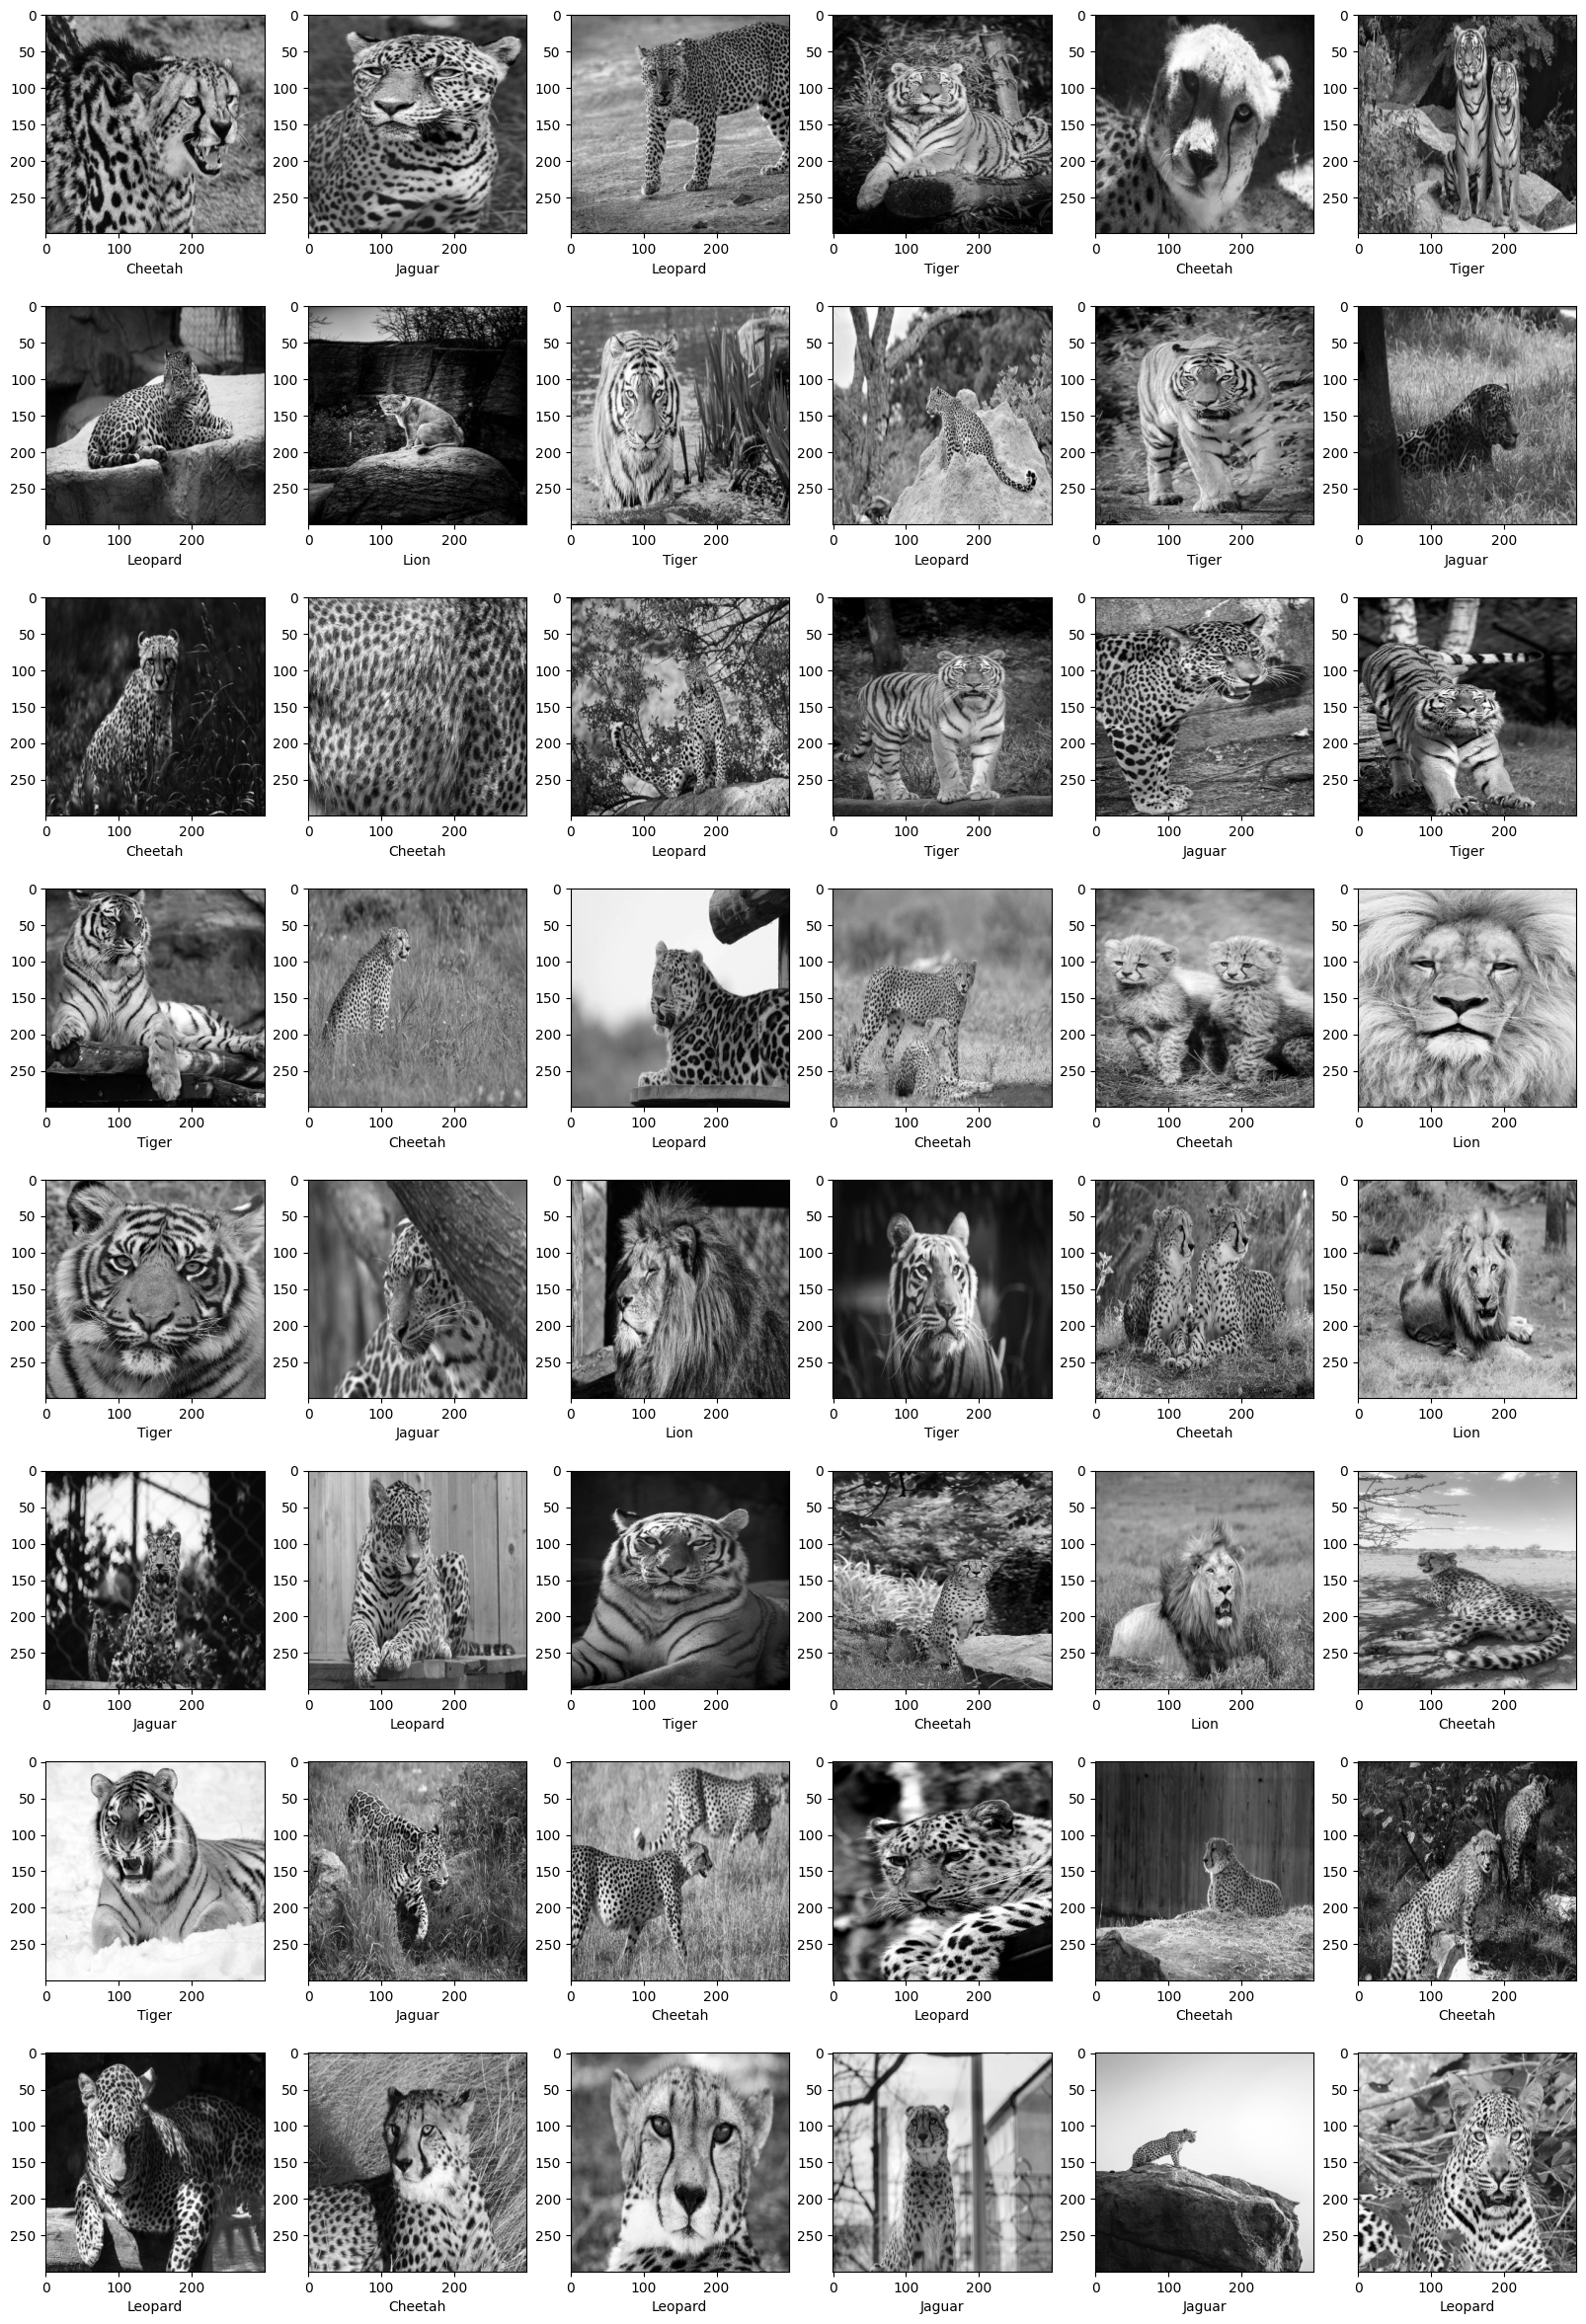

In [ ]:
plt.figure(figsize=(20,30))
for i in range(48):
  plt.subplot(8,6,i+1)
  plt.imshow(X_train[i][0],cmap='gray')
  plt.xlabel(foldernames[X_train[i][1]])
plt.show()

**For KNN, will use L2 distance and 5-fold cross-validation, measuring accuracy with the validation set. With 170 images, we’ll split the data into five folds, four for training and one for validation.**

In [ ]:
def comparator(dis):
  return dis[2]

In [ ]:
def euclidian_distance(training_img,validate_img):
  return np.sqrt(np.sum((training_img-validate_img)**2))

**This function calculates the distance between a validation image and each training image for every fold.**

In [ ]:
def distance(training_data,validate_data):
  list_dis=[]
  for validate_img in validate_data:
    val_label_train_label_distance=[]
    for training_img in training_data:
      l2_distance=euclidian_distance(training_img[0],validate_img[0])
      val_label_train_label_distance.append([training_img[1],validate_img[1],l2_distance])

    val_label_train_label_distance.sort(key=comparator)
    first_thirty_data=val_label_train_label_distance[:]
    list_dis.append(val_label_train_label_distance)
  return list_dis

**Split our dataset into five folds and calculate the distances for each fold, where each fold contains both training and validation data.**

In [ ]:
fold1 = X_train[:34]
fold2 = X_train[34:68]
fold3 = X_train[68:102]
fold4 = X_train[102:136]
fold5 = X_train[136:]

**After splitting the dataset, will use 5-fold cross-validation. In each fold, four parts will be used for training, and the remaining part will be used for validation.**

In [ ]:
first_train = fold1 + fold2 + fold3 + fold4
first_validate=fold5
second_train=fold1+fold2+fold3+fold5
second_validate=fold4
third_train=fold1+fold2+fold4+fold5
third_validate=fold3
fourth_train=fold1+fold3+fold4+fold5
fourth_validate=fold2
fifth_train=fold2+fold3+fold4+fold5
fifth_validate=fold1

**Now, calculate the distances for each fold. list_dis_one represents the Euclidean distances for each validation image in fold 1, with the validation images stored in the first_validate dataset. Each validation dataset contains 34 images per fold.**

In [ ]:
list_dis_one=distance(first_train,first_validate)
print(type(list_dis_one))

<class 'list'>


In [ ]:
print(len(list_dis_one))

34


**Each list has 136 columns.**

In [ ]:
print(len(list_dis_one[0]))

136


In [ ]:
all_dis=[]

**For each fold, calculate the Euclidean distances.**

In [ ]:
list_dis_two=distance(second_train,second_validate)
list_dis_three=distance(third_train,third_validate)
list_dis_four=distance(fourth_train,fourth_validate)
list_dis_five=distance(fifth_train,fifth_validate)
all_dis.append(list_dis_one)
all_dis.append(list_dis_two)
all_dis.append(list_dis_three)
all_dis.append(list_dis_four)
all_dis.append(list_dis_five)

In [ ]:
print(len(all_dis))

5


**The calculate_accuracy function calculates accuracy by comparing the validation labels with the training labels for each k value (1 to 30). For each fold, we fetch the first k neighbors, count correct predictions, and calculate accuracy by dividing correct predictions by 34 (the total validation images). Majority voting is used to determine if KNN predicts correctly, and this approach works well for KNN in this case.**

In [ ]:
def calculate_accuracy(list_dis_one, k_values):
    total_validation_images = len(list_dis_one)
    accuracies = []

    for k in k_values:
        correct_predictions = 0

        for validation_neighbors in list_dis_one:
            top_k_neighbors = validation_neighbors[:k]
            validation_label = top_k_neighbors[0][1]

            training_labels = [neighbor[0] for neighbor in top_k_neighbors]

            majority_label = max(set(training_labels), key=training_labels.count)

            if majority_label == validation_label:
                correct_predictions += 1

        accuracy = correct_predictions / total_validation_images
        accuracies.append(accuracy)

    return accuracies



**Here, we use a list for k, and for each fold, we calculate the accuracies for k values ranging from 1 to 30.**

In [ ]:
k_values = list(range(1, 31, 1))
all_accuracies = []

for fold_dis in all_dis:
    fold_accuracy = calculate_accuracy(fold_dis, k_values)
    all_accuracies.append(fold_accuracy)

**Since we use 5-fold cross-validation, we have five rows, with each row containing the accuracy values for k=1 to k=30.**

In [ ]:
print(len(all_accuracies))

5


**After calculating the accuracies for each k, we plot the results. For each k, we have five data points, one for each fold. For example, for k=1, we calculate the accuracy for each fold, and so on for the other k values.**

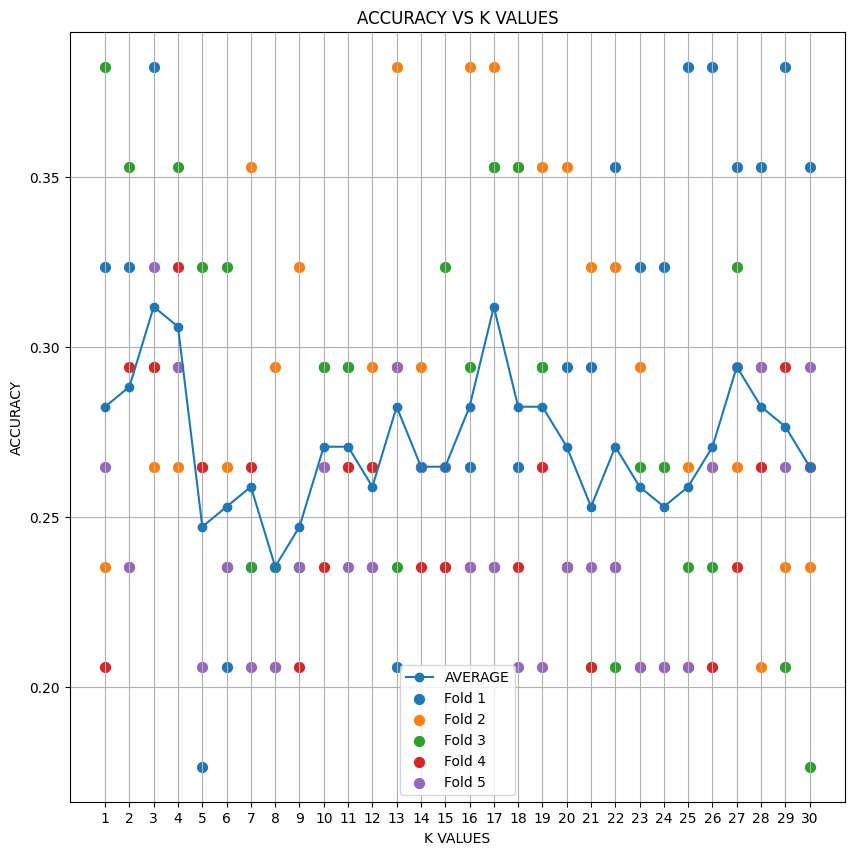

In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 31, 1))

mean_accuracies = [sum(accuracies) / len(all_accuracies) for accuracies in zip(*all_accuracies)]

plt.figure(figsize=(10, 10))
plt.plot(k_values, mean_accuracies, marker='o', label='AVERAGE')
for i, fold_accuracies in enumerate(all_accuracies):
    plt.scatter(k_values, fold_accuracies, label=f'Fold {i+1}', marker='o', s=50)

plt.xlabel('K VALUES')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS K VALUES')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()